In [3]:
import pandas as pd 
############### This script used to produce a single day EV data to add them in optimization problem ##########################

# Load the Excel file
file_path = 'EV_Data_Cyprus.xlsx' 

# Read the 'Departure' and 'Arrival' sheets, ignoring the first row
departure = pd.read_excel(file_path, sheet_name='Departure', skiprows=1)
arrival = pd.read_excel(file_path, sheet_name='Arrival', skiprows=1)
distance = pd.read_excel(file_path, sheet_name='Distance', skiprows=1)


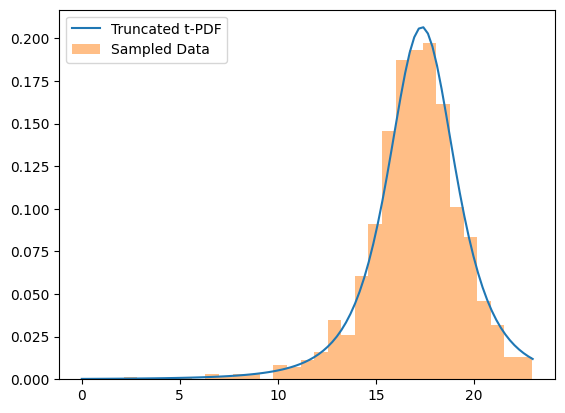

In [4]:
import numpy as np
from scipy.stats import t

# Fit the Student's t-distribution to the data
df, loc_arrival, scale_arrival = t.fit(arrival)

# Parameters for truncation
a, b = 0, 23  # Truncation limits

# Compute the CDF values for the truncation limits
a_cdf = t.cdf(a, df, loc=loc_arrival, scale=scale_arrival)
b_cdf = t.cdf(b, df, loc=loc_arrival, scale=scale_arrival)

# Define the truncated t-distribution PDF and sampling function
def truncated_t_pdf(x, df, loc, scale, a_cdf, b_cdf):
    normalization = b_cdf - a_cdf
    pdf = t.pdf(x, df, loc=loc, scale=scale)
    return pdf / normalization

def truncated_t_sample(df, loc, scale, a, b, size=1):
    # Rejection sampling method for truncation
    samples = []
    while len(samples) < size:
        x = t.rvs(df, loc=loc, scale=scale, size=1)[0]
        if a <= x <= b:
            samples.append(x)
    return np.array(samples)

# Example usage
x = np.linspace(a, b, 100)  # Points in the truncation range
pdf_values = truncated_t_pdf(x, df, loc_arrival, scale_arrival, a_cdf, b_cdf)

# Generate truncated t-distribution samples
samples = truncated_t_sample(df, loc_arrival, scale_arrival, a, b, size=1000)

# Plot the truncated PDF (optional)
import matplotlib.pyplot as plt
plt.plot(x, pdf_values, label='Truncated t-PDF')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Sampled Data')
plt.legend()
plt.show()


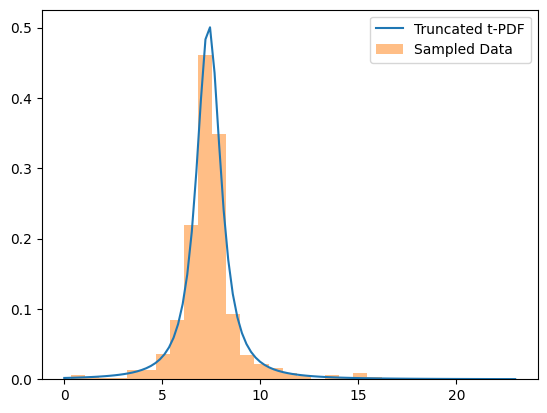

In [9]:
import numpy as np
from scipy.stats import t

# Fit the Student's t-distribution to the data
df, loc_departure, scale_departure = t.fit(departure)

# Parameters for truncation
a, b = 0, 23  # Truncation limits

# Compute the CDF values for the truncation limits
a_cdf = t.cdf(a, df, loc=loc_departure, scale=scale_departure)
b_cdf = t.cdf(b, df, loc=loc_departure, scale=scale_departure)

# Define the truncated t-distribution PDF and sampling function
def truncated_t_pdf(x, df, loc, scale, a_cdf, b_cdf):
    normalization = b_cdf - a_cdf
    pdf = t.pdf(x, df, loc=loc, scale=scale)
    return pdf / normalization

def truncated_t_sample(df, loc, scale, a, b, size=1):
    # Rejection sampling method for truncation
    samples = []
    while len(samples) < size:
        x = t.rvs(df, loc=loc, scale=scale, size=1)[0]
        if a <= x <= b:
            samples.append(x)
    return np.array(samples)

# Example usage
x = np.linspace(a, b, 100)  # Points in the truncation range
pdf_values = truncated_t_pdf(x, df, loc_departure, scale_departure, a_cdf, b_cdf)

# Generate truncated t-distribution samples
samples = truncated_t_sample(df, loc_departure, scale_departure, a, b, size=1000)


# Plot the truncated PDF (optional)
import matplotlib.pyplot as plt
plt.plot(x, pdf_values, label='Truncated t-PDF')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Sampled Data')
plt.legend()
plt.show()


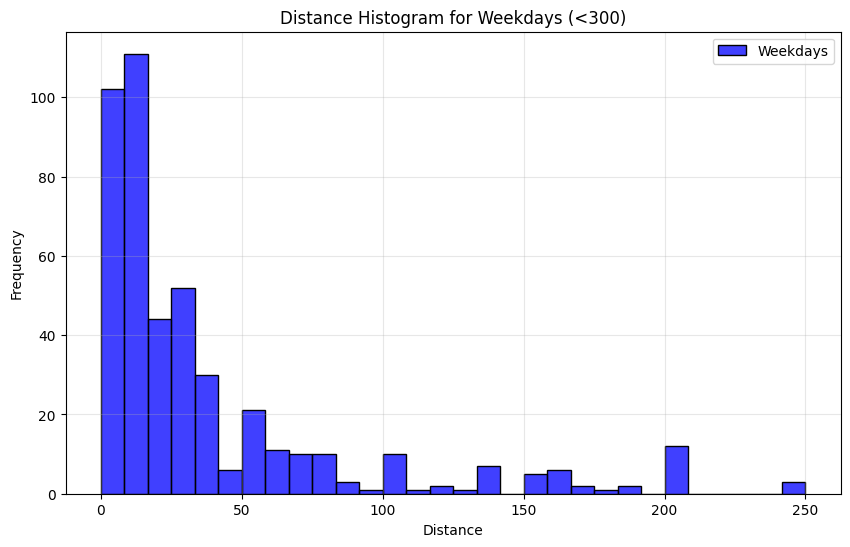

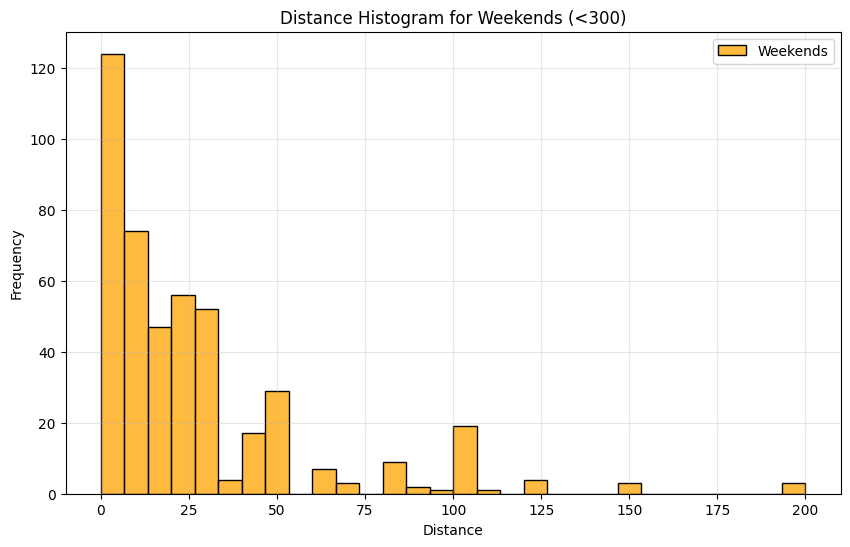

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for better visuals

# Assume `distance` is your DataFrame with distances for weekdays and weekends

############--------------------------------------- Distance for Weekdays -------------------------------------#########################

# Step 1: Count the frequency of each unique value
value_counts_weekdays = pd.Series(distance.iloc[:, 0][distance.iloc[:, 0] < 300]).value_counts()

# Step 2: Calculate probabilities
values_weekdays = value_counts_weekdays.index  # Unique values
probabilities_weekdays = value_counts_weekdays / value_counts_weekdays.sum()  # Normalize counts to probabilities

# Plot histogram for weekdays
plt.figure(figsize=(10, 6))
sns.histplot(
    distance.iloc[:, 0][distance.iloc[:, 0] < 300], 
    bins=30, kde=False, color="blue", label="Weekdays"
)
plt.title("Distance Histogram for Weekdays (<300)")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Example of selecting a random value based on probabilities
random_value_weekdays = np.random.choice(values_weekdays, p=probabilities_weekdays)

############--------------------------------------- Distance for Weekends -------------------------------------#########################

# Step 1: Count the frequency of each unique value
value_counts_weekends = pd.Series(distance.iloc[:, 1][distance.iloc[:, 1] < 300]).value_counts()

# Step 2: Calculate probabilities
values_weekends = value_counts_weekends.index  # Unique values
probabilities_weekends = value_counts_weekends / value_counts_weekends.sum()  # Normalize counts to probabilities

# Plot histogram for weekends
plt.figure(figsize=(10, 6))
sns.histplot(
    distance.iloc[:, 1][distance.iloc[:, 1] < 300], 
    bins=30, kde=False, color="orange", label="Weekends"
)
plt.title("Distance Histogram for Weekends (<300)")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Example of selecting a random value based on probabilities
random_value_weekends = np.random.choice(values_weekends, p=probabilities_weekends)


31 32
   Arrival Time  Departure Time  Distance (Weekdays)
0            36              14                 20.0
1            33              14                 50.0
2            31              17                 15.0
3            31              13                  0.0
4            32              10                140.0


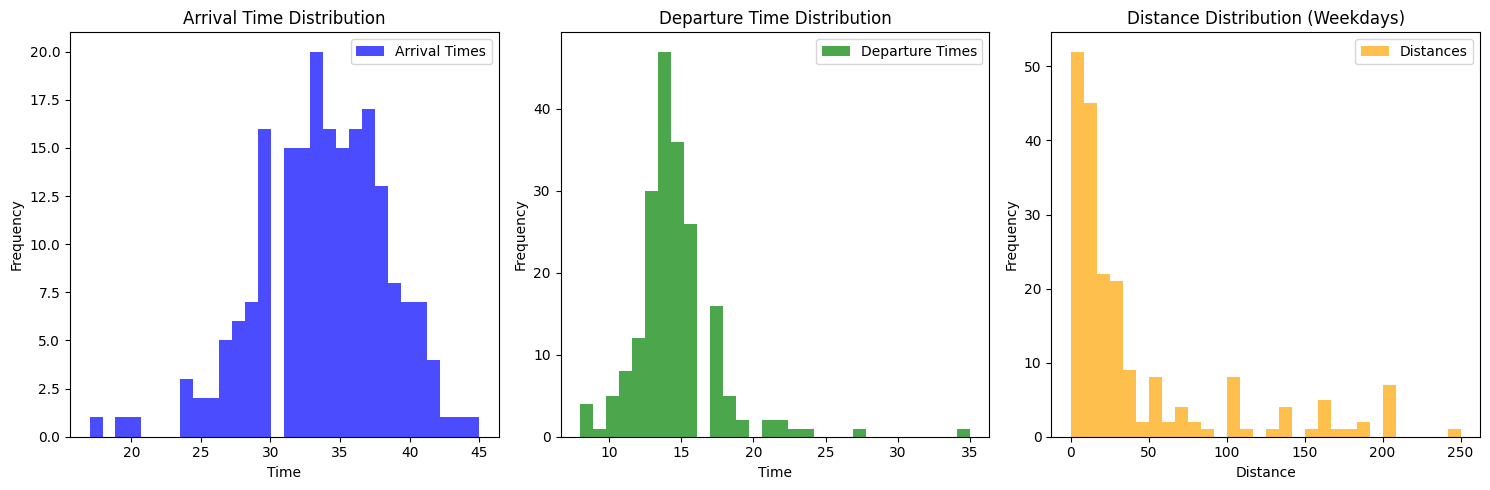

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t, truncnorm
import matplotlib.pyplot as plt

# Fit parameters for arrival and departure (Student's t-distribution)
df_arrival, loc_arrival, scale_arrival = t.fit(arrival)  # Replace `arrival` with your dataset
df_departure, loc_departure, scale_departure = t.fit(departure)  # Replace `departure` with your dataset

# Truncation limits
a, b = 0, 23  # Time range for arrival and departure

# Standardize truncation limits for t-distribution
a_arrival_std = (a - loc_arrival) / scale_arrival
b_arrival_std = (b - loc_arrival) / scale_arrival
a_departure_std = (a - loc_departure) / scale_departure
b_departure_std = (b - loc_departure) / scale_departure

# Generate the truncated t-distributions
truncated_arrival = t(df_arrival, loc=loc_arrival, scale=scale_arrival)
truncated_departure = t(df_departure, loc=loc_departure, scale=scale_departure)

# For distance (Weekdays): Histogram-based probabilities
value_counts_weekdays = pd.Series(distance.iloc[:, 0][distance.iloc[:, 0] < 300]).value_counts()
values_weekdays = value_counts_weekdays.index  # Unique distance values
probabilities_weekdays = value_counts_weekdays / value_counts_weekdays.sum()  # Probabilities

# Function to generate a single customer behavior
def generate_customer_behavior():
    # Random selection of arrival time
    arrival_time = truncated_arrival.rvs(1, random_state=np.random.randint(0, 1e6))
    while arrival_time < a or arrival_time > b:  # Ensure truncation
        arrival_time = truncated_arrival.rvs(1, random_state=np.random.randint(0, 1e6))
    arrival_time=int(arrival_time[0]*2)
    # Random selection of departure time
    departure_time = truncated_departure.rvs(1, random_state=np.random.randint(0, 1e6))    
    
    while departure_time < a or departure_time > b:  # Ensure truncation
        departure_time = truncated_departure.rvs(1, random_state=np.random.randint(0, 1e6))
    departure_time=int(departure_time[0]*2)

    while arrival_time<departure_time:
        while departure_time < a or departure_time > b:  # Ensure truncation
            departure_time = truncated_departure.rvs(1, random_state=np.random.randint(0, 1e6))
        departure_time=int(departure_time[0]*2)
        
    # Random selection of distance
    distance_weekdays = np.random.choice(values_weekdays, p=probabilities_weekdays)

    return arrival_time, departure_time, distance_weekdays

# Generate behavior for 200 customers
customer_behaviors = [generate_customer_behavior() for _ in range(200)]

# Convert to DataFrame for analysis
customer_df = pd.DataFrame(customer_behaviors, columns=["Arrival Time", "Departure Time", "Distance (Weekdays)"])

# Display the first few rows
print(customer_df.head())

# Save to CSV if needed
customer_df.to_csv("customer_behaviors.csv", index=False)

# Plot histograms of generated data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(customer_df["Arrival Time"], bins=30, color="blue", alpha=0.7, label="Arrival Times")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Arrival Time Distribution")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(customer_df["Departure Time"], bins=30, color="green", alpha=0.7, label="Departure Times")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Departure Time Distribution")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(customer_df["Distance (Weekdays)"], bins=30, color="orange", alpha=0.7, label="Distances")
plt.xlabel("Distance")

plt.ylabel("Frequency")
plt.title("Distance Distribution (Weekdays)")
plt.legend()

plt.tight_layout()
plt.show()
